# <font color=green>Model Validation</font> 
In this tutorial, we will compare the performance of each model with the ensemble mean, resulting in model bias.

## <font color=green>1 Import pakages

In [ ]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import netCDF4
from netCDF4 import Dataset
import cftime
from cftime import DatetimeNoLeap
from cnmaps import get_adm_maps, draw_map, draw_maps

In [2]:
# make a list of all the models
models_list = ['BCC', 'MPI', 'EC', 'CanESM5', 'CNRM', 'CESM2', 'UKESM1', 'MIROC', 'IPSL']

## <font color=green>2 Make plots
The following steps are explained in detail in Effects Quantification.

<Figure size 2160x1800 with 0 Axes>

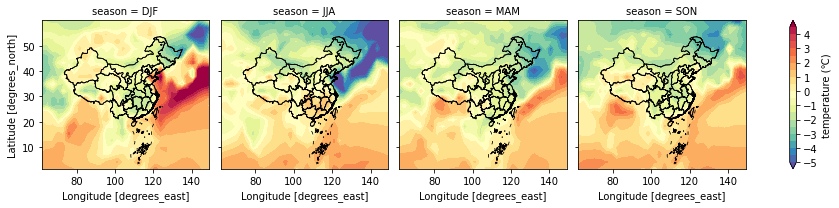

<Figure size 2160x1800 with 0 Axes>

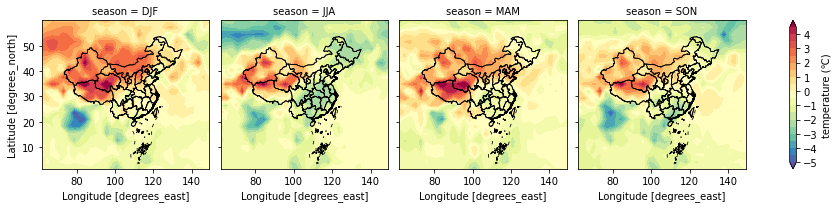

<Figure size 2160x1800 with 0 Axes>

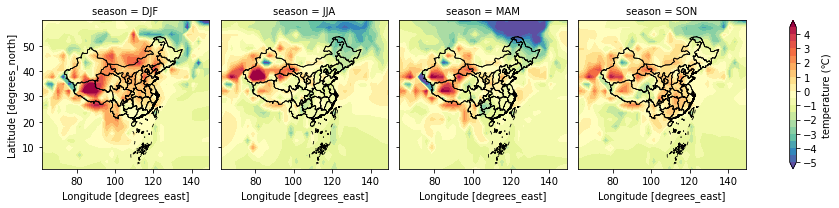

<Figure size 2160x1800 with 0 Axes>

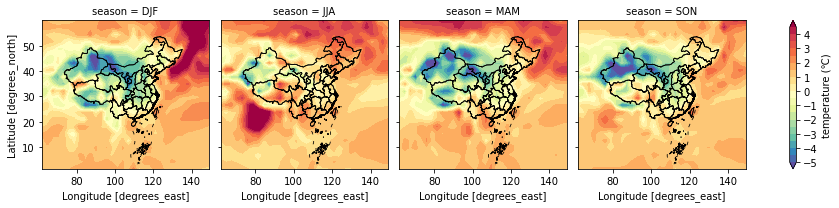

<Figure size 2160x1800 with 0 Axes>

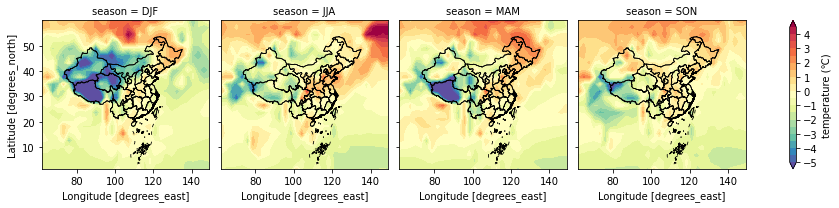

<Figure size 2160x1800 with 0 Axes>

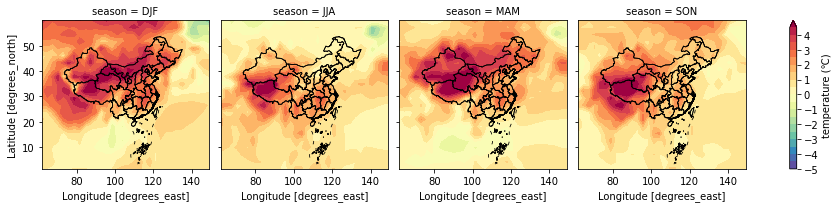

<Figure size 2160x1800 with 0 Axes>

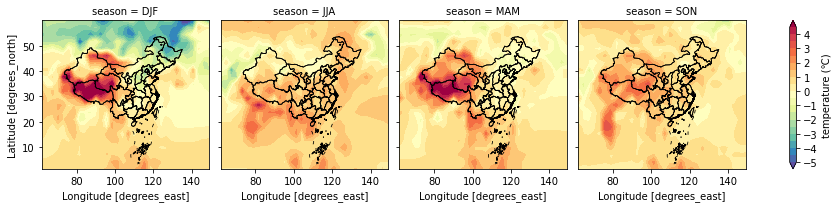

<Figure size 2160x1800 with 0 Axes>

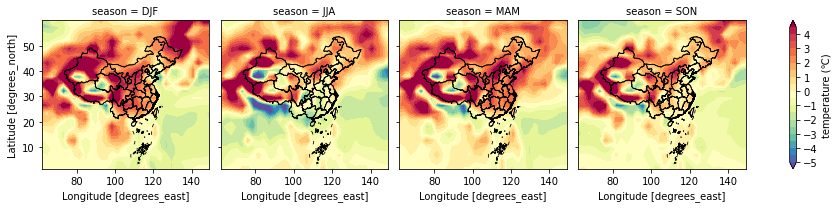

<Figure size 2160x1800 with 0 Axes>

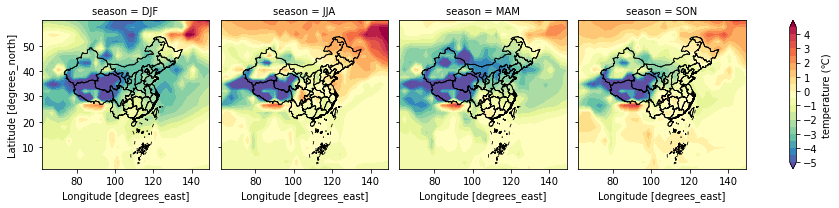

In [5]:
for mod in models_list:
    #read data
    dset_mod = xr.open_dataset('/home/users/ruoou/projects/data/cmip6/scenaromip/ssp126/tas_single/' + mod + '_remap.nc')
    dset_mean = xr.open_dataset('/home/users/ruoou/projects/data/cmip6/scenaromip/ssp126/tas_single/nc_ensmean.nc')

    #define time
    time = dset_mod.time
    clim_set_t = dset_mod.sel(time=slice("2015-01-16", "2100-12-16"))
    clim_ta_mod = clim_set_t['tas'].groupby('time.season').mean('time', keep_attrs=True)

    time = dset_mean.time
    clim_set_t = dset_mean.sel(time=slice("2015-01-16", "2100-12-16"))
    clim_ta_mean = clim_set_t['tas'].groupby('time.season').mean('time', keep_attrs=True)
    
    #each model - ensemble mean
    ta_diff = clim_ta_mod - clim_ta_mean 

    # define areas
    lat = dset_mod.lat
    lon = dset_mod.lon
    lon_range = lon[(lon>60) & (lon<150)]
    lat_range = lat[(lat>0) & (lat<60)]
    
    # create faceted plots
    fig = ta_diff.sel(lon=lon_range, lat=lat_range).plot.contourf(col = 'season', col_wrap = 4, 
                                                            #transform=ccrs.PlateCarree(),
                                                            levels=np.arange(-5, 5, 0.5),
                                                            cmap = 'Spectral_r', 
                                                            cbar_kwargs={'orientation': 'vertical',     #colorbar
                                                                         'label': 'temperature (℃)',
                                                                         'ticks': np.arange(-5, 5, 1),
                                                                         'pad': 0.05})

    
    # add China country (国) boundary and defne line feature
    fig.map(lambda:draw_maps(get_adm_maps(level= '国'), linewidth=0.8, color='k'));
    # add China provice (省) boundary
    fig.map(lambda:draw_maps(get_adm_maps(level= '省'), linewidth=0.8, color='k'));    